## New!

# Affective Computing - Sentiment Analysis Project
## Luka Cabraja

<p>In the realm of natural language processing, sentiment analysis stands out as a critical challenge, where the objective is to discern the emotional tone behind a body of text. This task is far from trivial, as it involves understanding context, irony, and subtlety in language use. Our problem specifically revolves around analyzing sentiments in dialogue, a complex task due to the dynamic nature of conversational exchanges and the layers of emotional subtext that can vary from one sentence to the next.</p>

<p>The dataset at the heart of our sentiment analysis model is the meticulously curated DailyDialog, a collection notable for its high-quality, multi-turn dialogues that are reflective of everyday human interaction. Crafted with human-written exchanges and marked by minimal noise, it spans a spectrum of topics pertinent to daily life. Each dialogue is manually annotated with nuanced details of communication intentions and emotions, providing a richly layered context for our analytical models. Our ambition is to leverage this dataset to not only assess but also advance the current methodologies in the dialog system research domain.</p>

<p>By scrutinizing the matrix, we can identify the specific areas where improvements in sentiment classification are needed, thereby guiding the refinement and optimization of the sentiment analysis algorithm. Moreover, the confusion matrix serves as a diagnostic tool, shedding light on the strengths and weaknesses of the sentiment analysis model and highlighting areas for further investigation and enhancement. Through a comprehensive analysis of the confusion matrix, we gain valuable insights.</p>

## New!

<p>Continuing from the insights gleaned from the confusion matrix, our selected model's architecture—comprising an Embedding layer, LSTM, and a Dense layer with softmax—was chosen to address these findings. This architecture aims to capture the complex temporal dependencies and nuanced emotional contexts within dialogues. The balance struck between model complexity and predictive accuracy is reflected in the validation results, indicating a promising direction for future enhancements.</p>

In [59]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# Step 1: Preprocess the Text Data
texts = df['Utterance'].values
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=100)

# Step 2: Prepare the Labels
labels = to_categorical(df['Emotion'].values)


# Step 3: Split the Data into train, test and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Step 4: Build the Model
model = Sequential()
model.add(Embedding(10000, 128))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(labels.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 5: Train the Model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Step 6: Evaluate the Model on the validation set
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {test_acc*100:.2f}%')
# Epoch 2 0.8551

Epoch 1/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 43ms/step - accuracy: 0.8394 - loss: 0.5869 - val_accuracy: 0.8556 - val_loss: 0.4550
Epoch 2/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 44ms/step - accuracy: 0.8647 - loss: 0.4148 - val_accuracy: 0.8551 - val_loss: 0.4394
Epoch 3/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 43ms/step - accuracy: 0.8759 - loss: 0.3553 - val_accuracy: 0.8509 - val_loss: 0.4477
Epoch 4/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 43ms/step - accuracy: 0.8845 - loss: 0.3200 - val_accuracy: 0.8513 - val_loss: 0.4587
Epoch 5/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 44ms/step - accuracy: 0.8929 - loss: 0.2922 - val_accuracy: 0.8483 - val_loss: 0.4795
Epoch 6/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 44ms/step - accuracy: 0.8983 - loss: 0.2719 - val_accuracy: 0.8475 - val_loss: 0.4983
Epoch 7/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 44ms/step - accuracy: 0.9051 - loss: 0.2526 - val_accuracy: 0.8480 - val_loss: 0.5207
Epoch 8/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 104s 46ms/step - accuracy: 0.9092 

<p>Upon reviewing the model's performance over 10 epochs, it's evident that while training accuracy improves, reaching a peak of 91.87%, and training loss reduces to 0.2099, the validation accuracy experiences a slight decrease to 84.07%, with an uptick in validation loss. This discrepancy suggests the model is overfitting, mastering the training data nuances yet faltering on unseen data. To address this overfitting and enhance the model's ability to generalize, we plan to augment the model with additional context by incorporating metadata—specifically, `DialogueIndex`, `UtteranceIndex`, `SpeakerIndex`, `Act`, and `Topic`. By infusing the model with this richer dataset, we aim to provide a broader data spectrum, potentially improving its predictive accuracy and generalization capabilities across diverse datasets.</p>

In [60]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Step 1: Preprocess the Text Data
texts = df['Utterance'].values
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=100)

# Step 1.5: Preprocess the metadata
metadata = df[['DialogueIndex', 'UtteranceIndex', 'SpeakerIndex', 'Act', 'Topic']].values
encoder = OneHotEncoder()
metadata_encoded = encoder.fit_transform(metadata)


# Step 2: Prepare the Labels
labels = to_categorical(df['Emotion'].values)


# Step 3: Split the Data into train, test and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(np.hstack((text_data, metadata)), labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Separate text and metadata after split
X_train_text = X_train[:, :100]  # Assuming the first 100 columns are text data due to padding
X_train_meta = X_train[:, 100:]  # The rest are metadata

X_test_text = X_test[:, :100]
X_test_meta = X_test[:, 100:]

X_val_text = X_val[:, :100]
X_val_meta = X_val[:, 100:]


# Step 4: Build the Model
text_input = Input(shape=(100,), name='text_input')
meta_input = Input(shape=(X_train_meta.shape[1],), name='meta_input')

text_embedded = Embedding(10000, 128)(text_input)
text_lstm = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(text_embedded)

meta_dense = Dense(32, activation='relu')(meta_input)
meta_dropout = Dropout(0.2)(meta_dense)

concatenated = concatenate([text_lstm, meta_dropout])
output = Dense(labels.shape[1], activation='softmax')(concatenated)

model = Model(inputs=[text_input, meta_input], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# # Step 5: Train the Model
model.fit([X_train_text, X_train_meta], y_train, batch_size=32, epochs=10, validation_data=([X_test_text, X_test_meta], y_test))


# # Step 6: Evaluate the Model on the test set
test_loss, test_acc = model.evaluate([X_val_text, X_val_meta], y_val)
print(f'Validation Accuracy: {test_acc*100:.2f}%')
# epoch 5 0.8603


Epoch 1/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 99s 43ms/step - accuracy: 0.6652 - loss: 148.6549 - val_accuracy: 0.8257 - val_loss: 0.9977
Epoch 2/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 103s 46ms/step - accuracy: 0.8384 - loss: 0.7040 - val_accuracy: 0.7791 - val_loss: 0.6743
Epoch 3/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 101s 45ms/step - accuracy: 0.8527 - loss: 0.5219 - val_accuracy: 0.8571 - val_loss: 0.5244
Epoch 4/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 99s 44ms/step - accuracy: 0.8709 - loss: 0.3861 - val_accuracy: 0.8595 - val_loss: 0.4442
Epoch 5/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 44ms/step - accuracy: 0.8887 - loss: 0.3180 - val_accuracy: 0.8603 - val_loss: 0.4565
Epoch 6/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 100s 44ms/step - accuracy: 0.8956 - loss: 0.2887 - val_accuracy: 0.8511 - val_loss: 0.4733
Epoch 7/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 101s 45ms/step - accuracy: 0.9029 - loss: 0.2696 - val_accuracy: 0.8491 - val_loss: 0.4931
Epoch 8/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 102s 45ms/step - accuracy: 0

## New!

483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step


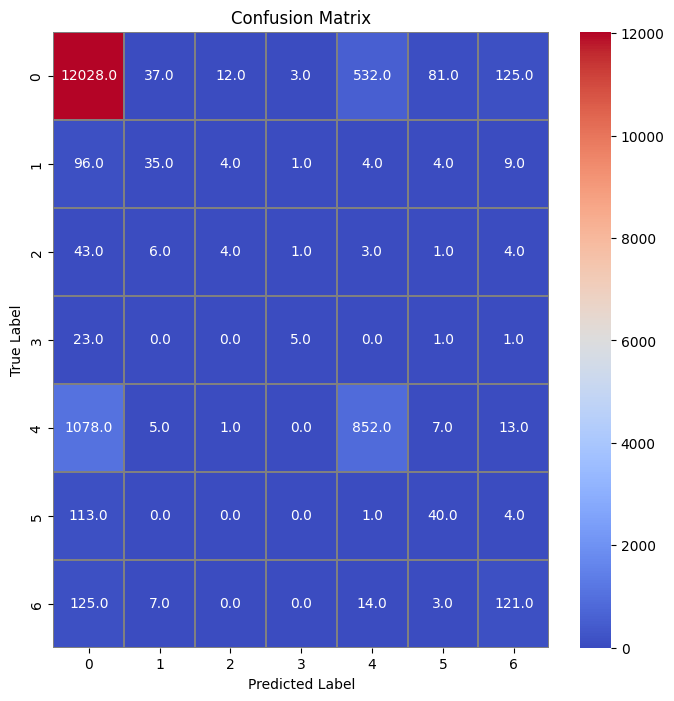

F1 Score: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     12818
           1       0.39      0.23      0.29       153
           2       0.19      0.06      0.10        62
           3       0.50      0.17      0.25        30
           4       0.61      0.44      0.51      1956
           5       0.29      0.25      0.27       158
           6       0.44      0.45      0.44       270

    accuracy                           0.85     15447
   macro avg       0.47      0.36      0.40     15447
weighted avg       0.83      0.85      0.84     15447



In [140]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the values from the validation dataset
y_pred = model.predict([X_val_text, X_val_meta])

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis=1) 

# Convert validation observations to one hot vectors
y_true = np.argmax(y_val, axis=1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

# plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="coolwarm", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# compute F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'F1 Score: {f1:.2f}')

# Print classification report
print('\nClassification Report:\n', classification_report(y_true, y_pred_classes))

## New!

<p>The introduction of metadata to the model has resulted in an intricate shift in performance dynamics, achieving a commendable training accuracy of 91.67% and a validation accuracy that peaked at 86.03%. Notably, while the overall F1 score of 0.84 indicates strong performance, this metric is heavily influenced by the model's proficiency in predicting the predominant 'no emotion' category. There is a clear discrepancy when it comes to the less represented classes, where precision and recall significantly drop, signaling an imbalance in the model's predictive power across different emotional states.</p>

<p>Furthermore, despite the enriched data through metadata, the model's performance plateau suggests a potential overfitting to the 'no emotion' category, highlighting a limitation in its ability to discern nuanced emotional shifts within dialogues. The challenge of analyzing dialogues as cohesive units remains, underscoring the need for more sophisticated models that can navigate the sequential and relational intricacies of conversational dynamics to capture complex emotional variations more effectively.</p>

<p>In light of these observations, we plan to pivot towards employing a transformer model, specifically utilizing the latest, cost-efficient ChatGPT model (gpt-3.5-turbo-0125). Our choice is driven by the inability to operationalize on-device transformer models effectively and the immediate availability and proven scalability of gpt-3.5-turbo-0125, which is already servicing millions of requests daily. This approach aims to leverage the advanced capabilities of transformer models in understanding and generating human-like text, potentially overcoming the current limitations in capturing the full emotional and contextual breadth of dialogues.</p>

<p>Prior to implementing the transformer model, our first step will be to carefully estimate the cost associated with running the model on the entire dataset. This essential preliminary analysis will ensure that our approach is not only technologically feasible but also economically viable, aligning with our resource management and budgetary constraints.</p>